# Clustering Stars by Temperature and Luminosity on the Hertzsprung-Russell Diagram

In [167]:
# load all libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering



In [168]:
# Load the dataset
data = pd.read_csv('filteredGaia2.csv')
data['SpType'] = data['SpType'].str.strip()

# Drop the first column
data.drop(data.columns[0], axis=1, inplace=True)

# Select columns to normalize
columns = ['Teff', 'Lum-Flame']

scaler = MinMaxScaler()
# data[columns] = scaler.fit_transform(data[columns])

# Save the normalized data
data.to_csv('normalizedGaia.csv', index=False)
dataN = pd.read_csv('normalizedGaia.csv')

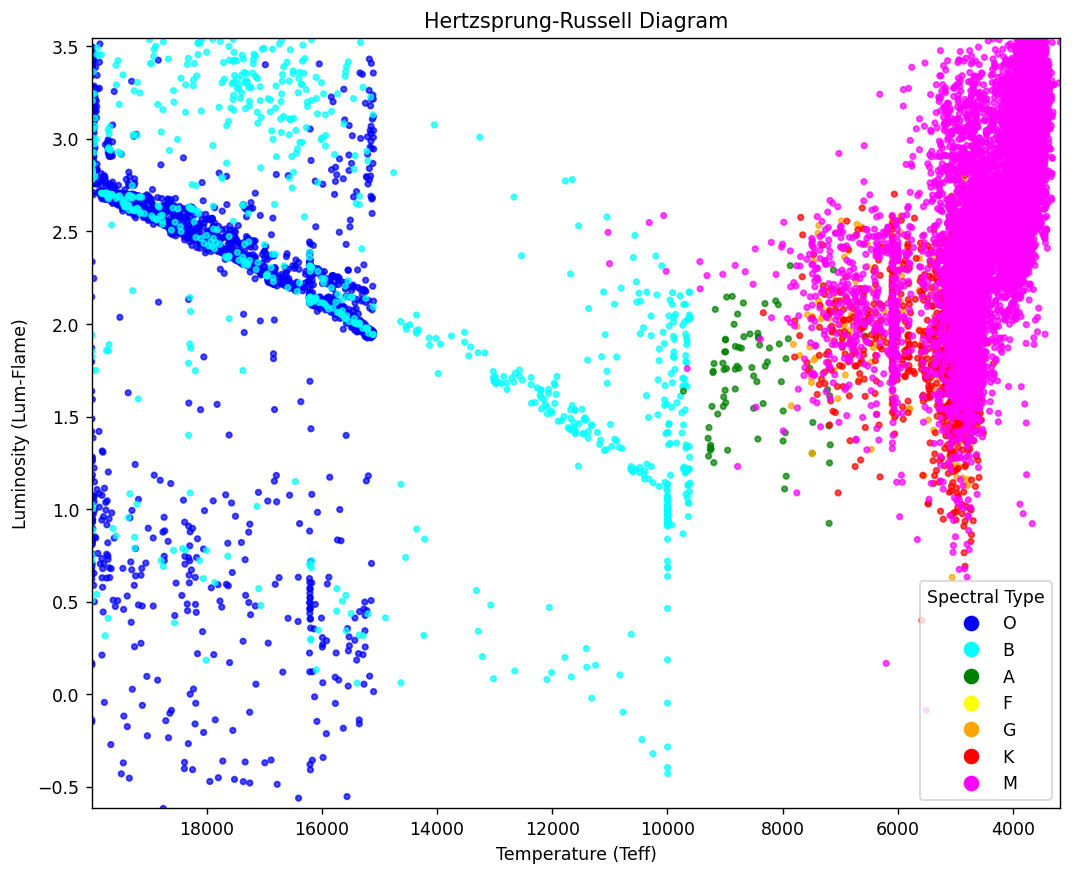

In [173]:
# Visualize the dataset with a scatter plot
# 10 groups (10 groups - White dwarfs, Giants, Supergiants, MainSequence-O, B, A, F, K, G, M)
# Use color to indicate the label?

# Visualize the dataset with a scatter plot
x1 = data['Teff'].values
y1 = data['Lum-Flame'].values
spectral_types = data['SpType'].values

# Apply log base 10 transformation to y1
y1_log = np.log10(y1)

# Remove values where y1_log is not defined (NaN or infinite)
mask = np.isfinite(y1_log)
x1 = x1[mask]
y1_log = y1_log[mask]
spectral_types = spectral_types[mask]

# Remove values where 14900 < x < 15100
mask = (x1 <= 14900) | (x1 >= 15100)
x1 = x1[mask]
y1_log = y1_log[mask]
spectral_types = spectral_types[mask]

# Define the range of the plot
maxX1 = max(x1)
minX1 = min(x1)
maxY1 = max(y1_log)
minY1 = min(y1_log)

# Define a color map for spectral types
color_map = {
    'O': 'blue',
    'B': 'cyan',
    'A': 'green',
    'F': 'yellow',
    'G': 'orange',
    'K': 'red',
    'M': 'magenta'
}

# Assign colors based on spectral types
colors = [color_map[sp] for sp in spectral_types]

# Create a scatter plot
plt.figure(figsize=(10, 8), dpi=125)
plt.scatter(x1, y1_log, c=colors, s=10, alpha=0.7)

# Add labels and title
plt.xlabel('Temperature (Teff)')
plt.ylabel('Luminosity (Lum-Flame)')
plt.title('Hertzsprung-Russell Diagram')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=sp) for sp, color in color_map.items()], title='Spectral Type')

plt.xlim(minX1, maxX1)  # Adjust these values based on your data range
plt.ylim(minY1, maxY1)  # Adjust these values based on your data range

plt.gca().invert_xaxis()

plt.show()

/Users/jaxon/miniconda3/envs/myenv1/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/jaxon/miniconda3/envs/myenv1/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/var/folders/b9/dh_d_rc51q1915gpp_pdvlch0000gn/T/ipykernel_23282/1930164676.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Spectral Type')


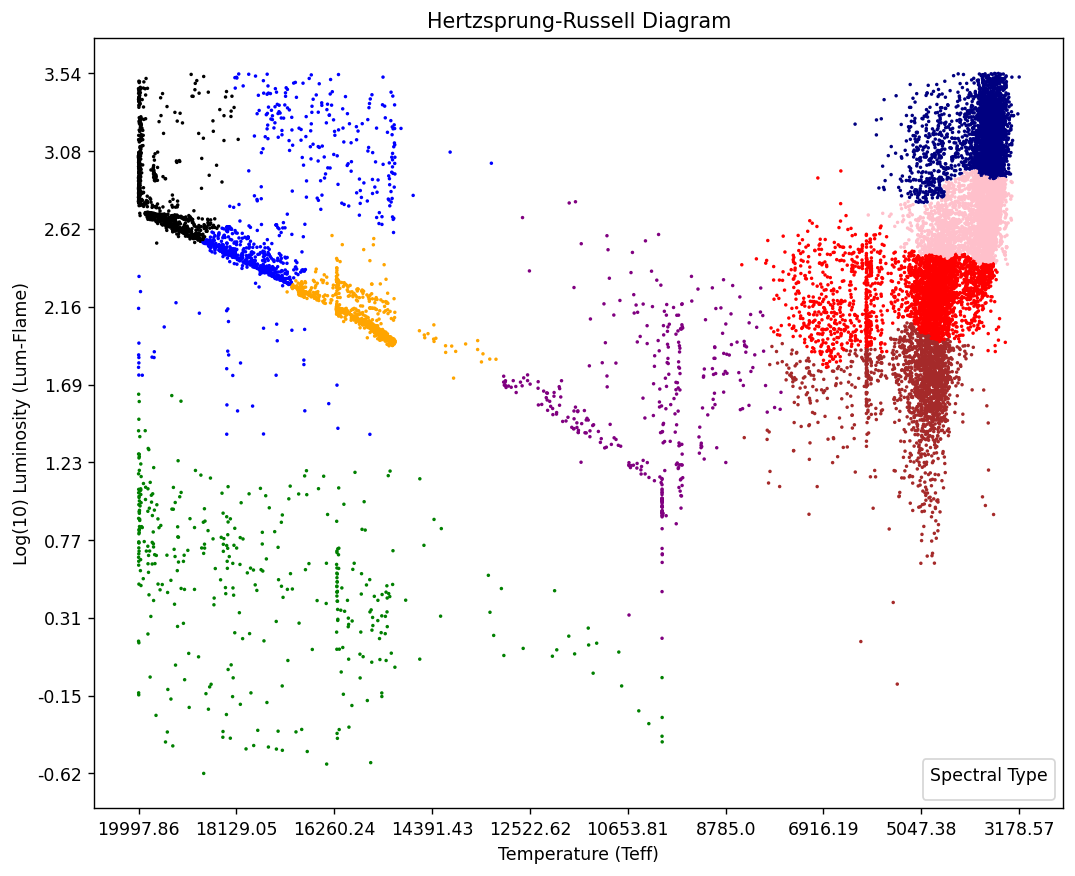

In [174]:
# Read the CSV file
df = pd.read_csv("filteredGaia2.csv")
    
# Remove rows where 'Lum-Flame' is null
df = df.dropna(subset=['Lum-Flame'])

# Apply log base 10 transformation to 'Lum-Flame'
df['Lum-Flame'] = np.log10(df['Lum-Flame'])

# Remove rows where 15000 < Teff < 15100
df = df[~df['Teff'].between(15000, 15100)]

# Get the min and max values of 'Teff' and 'Lum-Flame'
maxX = max(df['Teff'])
minX = min(df['Teff'])
maxY = max(df['Lum-Flame'])
minY = min(df['Lum-Flame'])
    
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
    
# Normalize the 'Teff' and 'Lum-Flame' columns
df[['Teff', 'Lum-Flame']] = scaler.fit_transform(df[['Teff', 'Lum-Flame']])

# Output the result to a new CSV file
df.to_csv("normalizedGaia.csv", index=False)

dataC = pd.read_csv('normalizedGaia.csv')

x = pd.DataFrame(dataC, columns=['Teff', 'Lum-Flame'])
y = pd.DataFrame(dataC, columns=['Spectral Type'])

# # Apply KMeans clustering
# model = KMeans(n_clusters=4)
# model.fit(x)

# Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=9)
predicted = model.fit_predict(x)

# plot kmeans obtained groups
plt.figure(figsize=(10, 8), dpi=125)
colors = np.array(['red', 'green', 'blue', 'navy', 'purple', 'orange', 'pink', 'brown', 'black'])
predicted = np.choose(model.labels_, [0,1,2,3,4,5,6,7,8]).astype(np.int64)

plt.scatter(x['Teff'], x['Lum-Flame'], c=colors[predicted], s=1)

x_ticks = np.linspace(minX, maxX, num=10)
y_ticks = np.linspace(minY, maxY, num=10)

# # Transform the ticks using the scaler
x_ticks_transformed = scaler.transform(np.column_stack((x_ticks, np.zeros_like(x_ticks))))[:, 0]
y_ticks_transformed = scaler.transform(np.column_stack((np.zeros_like(y_ticks), y_ticks)))[:, 1]

plt.xticks(ticks=x_ticks_transformed, labels=np.round(x_ticks, 2))
plt.yticks(ticks=y_ticks_transformed, labels=np.round(y_ticks, 2))

# Add labels and title
plt.xlabel('Temperature (Teff)')
plt.ylabel('Log(10) Luminosity (Lum-Flame)')
plt.title('Hertzsprung-Russell Diagram')
plt.legend(title='Spectral Type')

plt.gca().invert_xaxis()

plt.show()

In [175]:
# Error checking 